# Final Project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df=pd.read_csv('UsedCars.csv')
df.head(5)

Unnamed: 0                              Name    Location  Year  \
0           0            Maruti Wagon R LXI CNG      Mumbai  2010   
1           1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2           2                      Honda Jazz V     Chennai  2011   
3           3                 Maruti Ertiga VDI     Chennai  2012   
4           4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   

   Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage   Engine  \
0              72000       CNG       Manual      First  26.6 km/kg   998 CC   
1              41000    Diesel       Manual      First  19.67 kmpl  1582 CC   
2              46000    Petrol       Manual      First   18.2 kmpl  1199 CC   
3              87000    Diesel       Manual      First  20.77 kmpl  1248 CC   
4              40670    Diesel    Automatic     Second   15.2 kmpl  1968 CC   

       Power  Seats  New_Price  Price  
0  58.16 bhp    5.0        NaN   1.75  
1  126.2 bhp    5.0        NaN  12.50  
2   88.7 bhp    5.0  8.61 Lakh   4.50  
3  88.76 bhp    7.0        NaN   6.00  
4  140.8 bhp    5.0        NaN  17.74

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [4]:
df.shape

(6019, 14)

### Removing the unnecessary index column

In [5]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [6]:
list(df)

['Name',
 'Location',
 'Year',
 'Kilometers_Driven',
 'Fuel_Type',
 'Transmission',
 'Owner_Type',
 'Mileage',
 'Engine',
 'Power',
 'Seats',
 'New_Price',
 'Price']

### Calculating the number of null values in each feature

In [7]:
null_values=df.isnull().sum()
null_values=pd.DataFrame(null_values,columns=['null'])
sum_tot=len(df)
null_values['percent']=null_values['null']/sum_tot
round(null_values*100,3).sort_values('percent',ascending=False)

null  percent
New_Price          519500   86.310
Seats                4200    0.698
Engine               3600    0.598
Power                3600    0.598
Mileage               200    0.033
Name                    0    0.000
Location                0    0.000
Year                    0    0.000
Kilometers_Driven       0    0.000
Fuel_Type               0    0.000
Transmission            0    0.000
Owner_Type              0    0.000
Price                   0    0.000

### Since New_Price column has too many null values I drop it completely!

In [8]:
df=df.drop(columns=['New_Price'],axis=1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


### Modifyong the "Name" of the car and replacing it with its Brand which is more relevant here.

In [10]:
df['Name']=df.Name.str.split().str.get(0)
df['Name'].value_counts().sum()

6019

#### Since the count is 6019, therefore it means all are successfully modified.

In [11]:
df.head()

Name    Location  Year  Kilometers_Driven Fuel_Type Transmission  \
0   Maruti      Mumbai  2010              72000       CNG       Manual   
1  Hyundai        Pune  2015              41000    Diesel       Manual   
2    Honda     Chennai  2011              46000    Petrol       Manual   
3   Maruti     Chennai  2012              87000    Diesel       Manual   
4     Audi  Coimbatore  2013              40670    Diesel    Automatic   

  Owner_Type     Mileage   Engine      Power  Seats  Price  
0      First  26.6 km/kg   998 CC  58.16 bhp    5.0   1.75  
1      First  19.67 kmpl  1582 CC  126.2 bhp    5.0  12.50  
2      First   18.2 kmpl  1199 CC   88.7 bhp    5.0   4.50  
3      First  20.77 kmpl  1248 CC  88.76 bhp    7.0   6.00  
4     Second   15.2 kmpl  1968 CC  140.8 bhp    5.0  17.74

### Converting necessary cloumns to string so that they can be modified 

In [12]:
df['Engine'] = df['Engine'].astype(str)
df['Power'] = df['Power'].astype(str)
df['Mileage'] = df['Mileage'].astype(str)

### Modifying the columns to extract data which can process later

In [13]:
for i in range(df.shape[0]):
    df.at[i, 'Mileage'] = df['Mileage'][i].split()[0]
    df.at[i, 'Engine(CC)'] = df['Engine'][i].split()[0]
    df.at[i, 'Power(bhp)'] = df['Power'][i].split()[0]

### Converting them to float so that we can perform mathematical operations on them

In [14]:
df['Mileage'] = df['Mileage'].astype(float)
df['Engine(CC)'] = df['Engine(CC)'].astype(float)

#### Since some values in power were "null" , therefore removing them explicitly.

In [15]:
x = 'n'
cnt = 0
pos = []
for i in range(df.shape[0]):
    if df['Power(bhp)'][i]=='null':
        x = 'Y'
        cnt +=1
        pos.append(i)
print(x)
print(cnt)
print(pos)


Y
107
[76, 79, 89, 120, 143, 227, 245, 262, 307, 308, 386, 424, 428, 443, 472, 575, 631, 647, 648, 739, 748, 829, 915, 926, 934, 1068, 1143, 1153, 1271, 1319, 1345, 1388, 1419, 1555, 1578, 1649, 1672, 1857, 1999, 2053, 2130, 2164, 2262, 2267, 2305, 2343, 2369, 2393, 2441, 2450, 2497, 2501, 2527, 2579, 2597, 2635, 2640, 2891, 3033, 3061, 3104, 3189, 3247, 3290, 3439, 3516, 3533, 3589, 3628, 3638, 3645, 3669, 3733, 3800, 3882, 3898, 3930, 3999, 4077, 4080, 4351, 4354, 4629, 4709, 4714, 4744, 4830, 4886, 4900, 4954, 5065, 5119, 5228, 5426, 5438, 5458, 5529, 5533, 5647, 5755, 5759, 5861, 5873, 5893, 5925, 5943, 5985]


In [16]:
df = df.drop(df.index[pos])
df = df.reset_index(drop=True)

In [17]:
df.shape

(5912, 14)

### Now, we can convert the Power column to float type

In [18]:
df['Power(bhp)'] = df['Power(bhp)'].astype(float)

In [19]:
df.head()

Name    Location  Year  Kilometers_Driven Fuel_Type Transmission  \
0   Maruti      Mumbai  2010              72000       CNG       Manual   
1  Hyundai        Pune  2015              41000    Diesel       Manual   
2    Honda     Chennai  2011              46000    Petrol       Manual   
3   Maruti     Chennai  2012              87000    Diesel       Manual   
4     Audi  Coimbatore  2013              40670    Diesel    Automatic   

  Owner_Type  Mileage   Engine      Power  Seats  Price  Engine(CC)  \
0      First    26.60   998 CC  58.16 bhp    5.0   1.75       998.0   
1      First    19.67  1582 CC  126.2 bhp    5.0  12.50      1582.0   
2      First    18.20  1199 CC   88.7 bhp    5.0   4.50      1199.0   
3      First    20.77  1248 CC  88.76 bhp    7.0   6.00      1248.0   
4     Second    15.20  1968 CC  140.8 bhp    5.0  17.74      1968.0   

   Power(bhp)  
0       58.16  
1      126.20  
2       88.70  
3       88.76  
4      140.80

### Since we made different clean columns for engine and power, we don't require the same columns twice, therefore removing them

In [20]:
df.drop(["Engine"],axis=1,inplace=True)
df.drop(["Power"],axis=1,inplace=True)

### While glancing, I found out that there are some rows in mileage column with 0 value, since it is not possible, I replace them with null

In [21]:
df['Mileage'] = df['Mileage'].replace(0.0, None)
df['Mileage'] = df['Mileage'].replace(0.0, None)

In [22]:
df.head()

Name    Location  Year  Kilometers_Driven Fuel_Type Transmission  \
0   Maruti      Mumbai  2010              72000       CNG       Manual   
1  Hyundai        Pune  2015              41000    Diesel       Manual   
2    Honda     Chennai  2011              46000    Petrol       Manual   
3   Maruti     Chennai  2012              87000    Diesel       Manual   
4     Audi  Coimbatore  2013              40670    Diesel    Automatic   

  Owner_Type  Mileage  Seats  Price  Engine(CC)  Power(bhp)  
0      First    26.60    5.0   1.75       998.0       58.16  
1      First    19.67    5.0  12.50      1582.0      126.20  
2      First    18.20    5.0   4.50      1199.0       88.70  
3      First    20.77    7.0   6.00      1248.0       88.76  
4     Second    15.20    5.0  17.74      1968.0      140.80

### Again checking, what is the status of the data, i.e. , how much more cleaning is required

In [23]:
null_values=df.isnull().sum()
null_values=pd.DataFrame(null_values,columns=['null'])
sum_tot=len(df)
null_values['percent']=null_values['null']/sum_tot
round(null_values*100,3).sort_values('percent',ascending=False)

null  percent
Seats              3800    0.643
Engine(CC)         3600    0.609
Power(bhp)         3600    0.609
Mileage             200    0.034
Name                  0    0.000
Location              0    0.000
Year                  0    0.000
Kilometers_Driven     0    0.000
Fuel_Type             0    0.000
Transmission          0    0.000
Owner_Type            0    0.000
Price                 0    0.000

### Since after dropping all the bad data, not much of data is lost, therefore I drop all the bad data instead of approximately filling them

In [24]:
print("Shape of train data Before dropping any Row: ",df.shape)
df = df[df['Mileage'].notna()]
print("Shape of train data After dropping Rows with NULL values in Mileage: ",df.shape)
df = df[df['Engine(CC)'].notna()]
print("Shape of train data After dropping Rows with NULL values in Engine : ",df.shape)
df = df[df['Power(bhp)'].notna()]
print("Shape of train data After dropping Rows with NULL values in Power  : ",df.shape)
df = df[df['Seats'].notna()]
print("Shape of train data After dropping Rows with NULL values in Seats  : ",df.shape)

Shape of train data Before dropping any Row:  (5912, 12)
Shape of train data After dropping Rows with NULL values in Mileage:  (5910, 12)
Shape of train data After dropping Rows with NULL values in Engine :  (5874, 12)
Shape of train data After dropping Rows with NULL values in Power  :  (5874, 12)
Shape of train data After dropping Rows with NULL values in Seats  :  (5872, 12)


### The data is almost clean!

In [25]:
null_values=df.isnull().sum()
null_values=pd.DataFrame(null_values,columns=['null'])
sum_tot=len(df)
null_values['percent']=null_values['null']/sum_tot
round(null_values*100,3).sort_values('percent',ascending=False)

null  percent
Name                  0      0.0
Location              0      0.0
Year                  0      0.0
Kilometers_Driven     0      0.0
Fuel_Type             0      0.0
Transmission          0      0.0
Owner_Type            0      0.0
Mileage               0      0.0
Seats                 0      0.0
Price                 0      0.0
Engine(CC)            0      0.0
Power(bhp)            0      0.0

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5872 entries, 0 to 5911
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5872 non-null   object 
 1   Location           5872 non-null   object 
 2   Year               5872 non-null   int64  
 3   Kilometers_Driven  5872 non-null   int64  
 4   Fuel_Type          5872 non-null   object 
 5   Transmission       5872 non-null   object 
 6   Owner_Type         5872 non-null   object 
 7   Mileage            5872 non-null   float64
 8   Seats              5872 non-null   float64
 9   Price              5872 non-null   float64
 10  Engine(CC)         5872 non-null   float64
 11  Power(bhp)         5872 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 596.4+ KB


### Describing the data

In [27]:
df.describe()

Year  Kilometers_Driven      Mileage        Seats        Price  \
count  5872.000000       5.872000e+03  5872.000000  5872.000000  5872.000000   
mean   2013.477691       5.831700e+04    18.364848     5.283719     9.603919   
std       3.164568       9.216941e+04     4.188224     0.805081    11.249453   
min    1998.000000       1.710000e+02     6.400000     2.000000     0.440000   
25%    2012.000000       3.342250e+04    15.300000     5.000000     3.517500   
50%    2014.000000       5.260900e+04    18.330000     5.000000     5.750000   
75%    2016.000000       7.240275e+04    21.100000     5.000000    10.000000   
max    2019.000000       6.500000e+06    33.540000    10.000000   160.000000   

        Engine(CC)   Power(bhp)  
count  5872.000000  5872.000000  
mean   1625.745572   113.276894  
std     601.641783    53.881892  
min     624.000000    34.200000  
25%    1198.000000    75.000000  
50%    1495.500000    97.700000  
75%    1991.000000   138.100000  
max    5998.000000   560.000000

### Plotting the histogram of price

(0.0, 160.0)

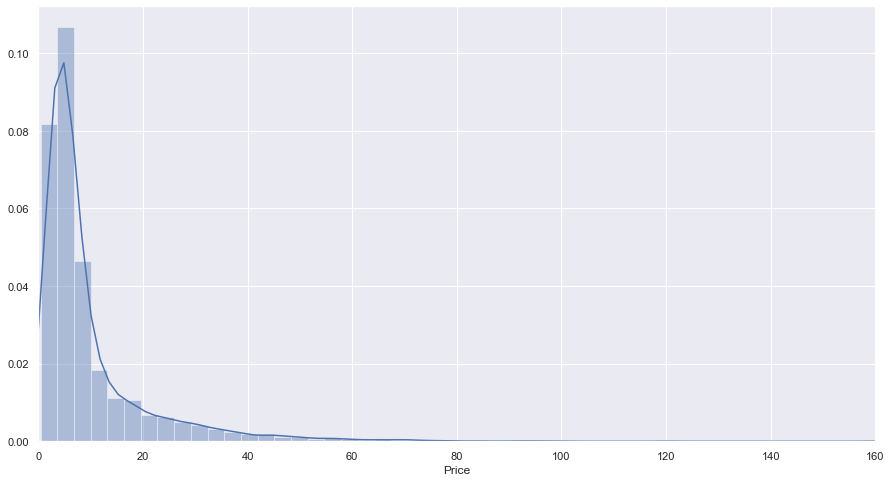

In [28]:
f, ax = plt.subplots(figsize=(15,8))
sns.distplot(df['Price'])
plt.xlim([0,160])

### Plotting the boxplot of Fuel_Type vs price
### Do petrol cars cost less?

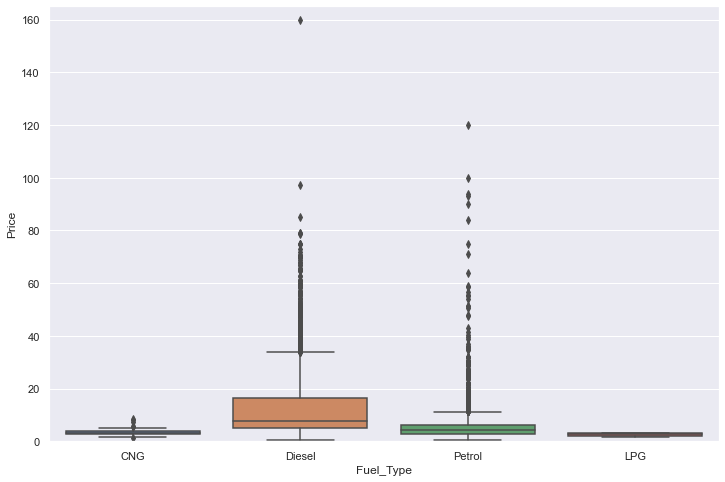

In [29]:
var = 'Fuel_Type'
data = pd.concat([df['Price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(12, 8))
fig = sns.boxplot(x=var, y="Price", data=data)
fig.axis(ymin=0, ymax=165);

## Inference: In general, costs vary as Diesel > Petrol > CNG > LPG

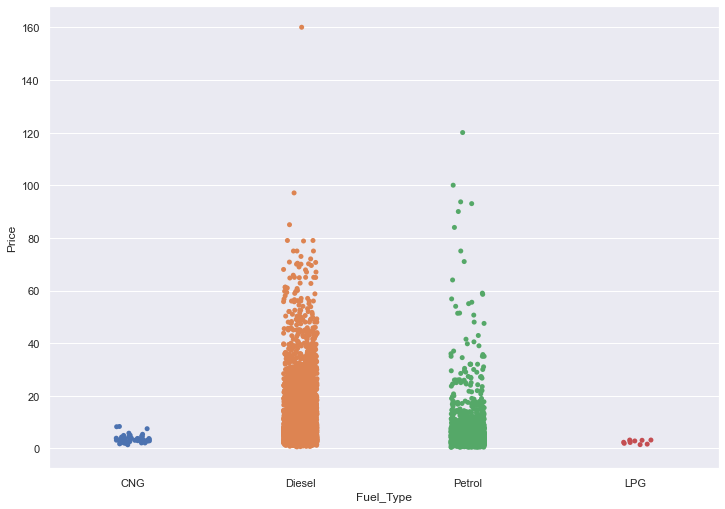

In [30]:
var = 'Fuel_Type'
fig, ax = plt.subplots()
fig.set_size_inches(12, 8.5)
sns.stripplot(x = var, y ='Price', data = data)

### Plotting the boxplot of Year vs Price
### Do new cars cost more?

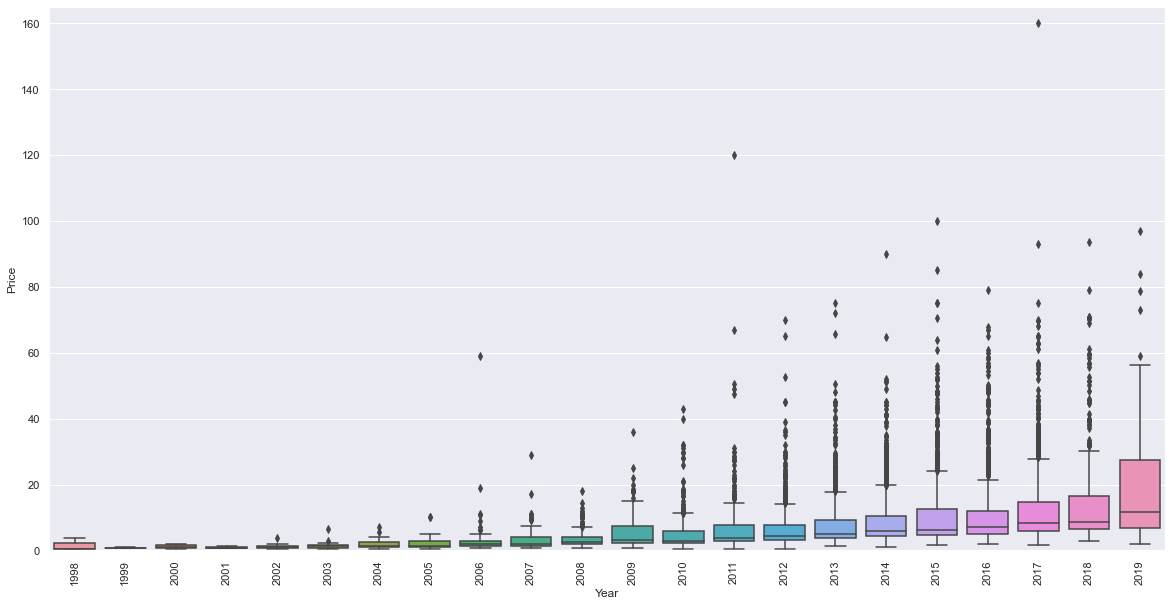

In [31]:
var = 'Year'
data = pd.concat([df['Price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 10))
fig = sns.boxplot(x=var, y="Price", data=data)
fig.axis(ymin=0, ymax=165);
plt.xticks(rotation=90);

## Inference: In general, newer cars have higher prices 

### Plotting the boxplot of Owner_Type vs Price
### Does less no. of owners cost more?

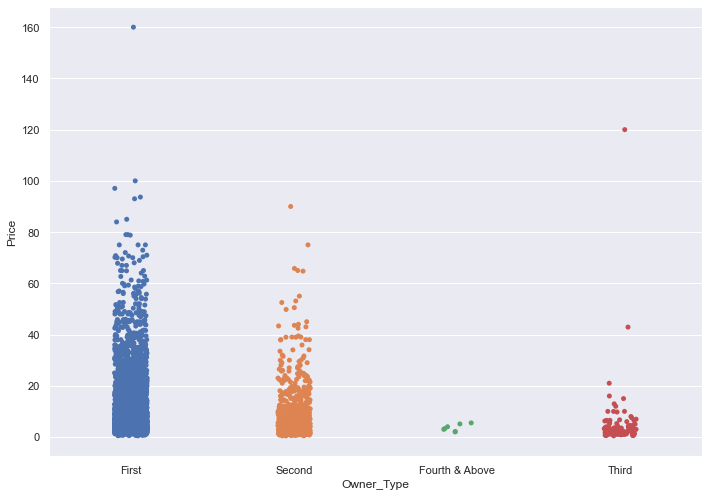

In [32]:
var = 'Owner_Type'
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.stripplot(x = var, y ='Price', data = df) 

## Inference: In general, the less the number of owners the car had, the more price it will sell

## Plotting the number of cars sold by each company

<Figure size 1440x720 with 0 Axes>

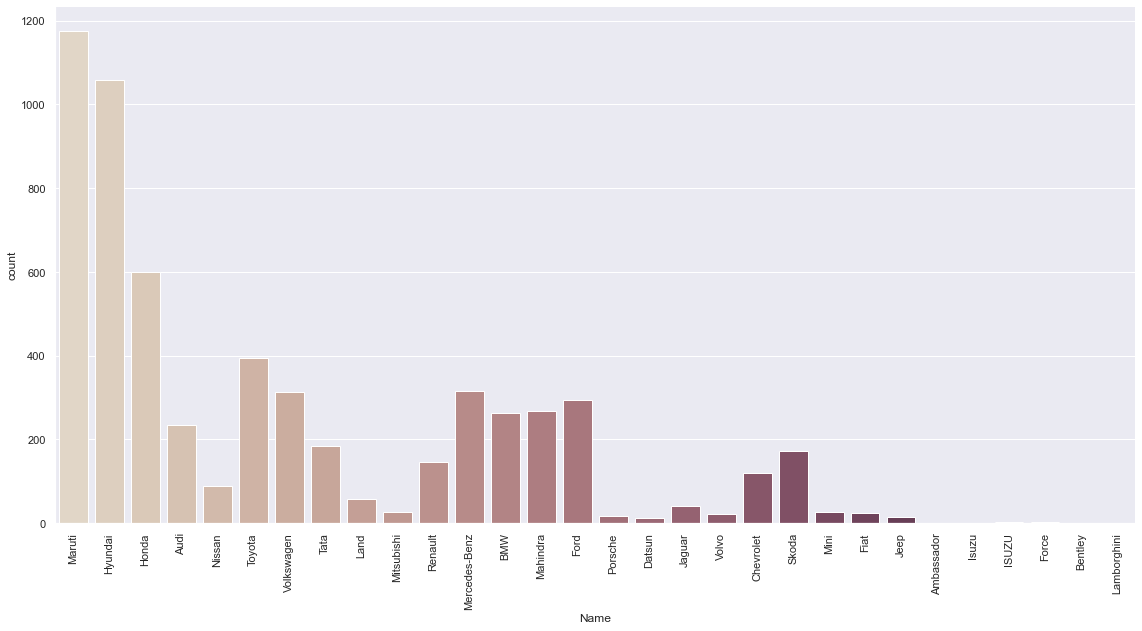

In [33]:
var = "Name"
plt.figure(figsize=(20, 10))
sns.catplot(x=var, kind="count", palette="ch:.25", height=8, aspect=2, data=df);
plt.xticks(rotation=90);

## Inference: Maruti has sold the most number of cars followed by Hyundai

## Plotting Brand vs Price

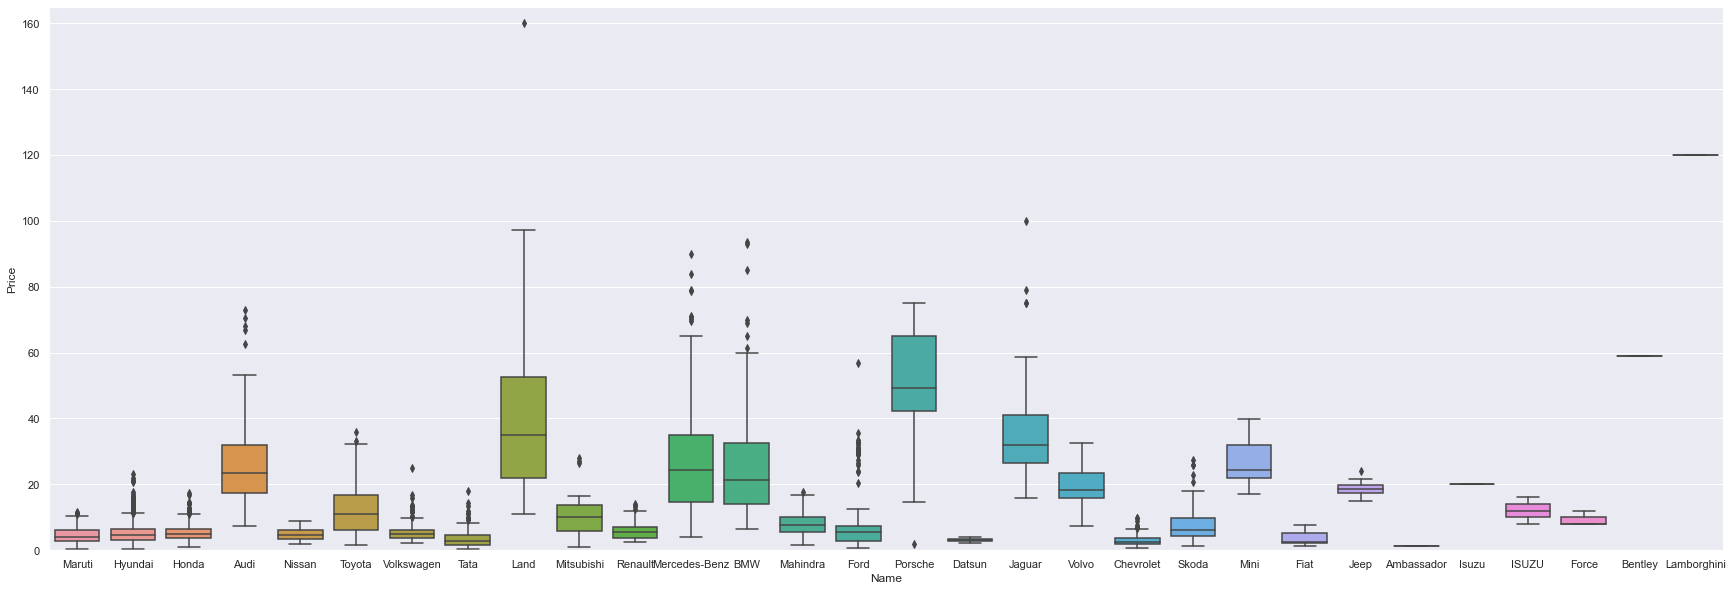

In [34]:
var = 'Name'
data = pd.concat([df['Price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(30, 10))
fig = sns.boxplot(x=var, y="Price", data=data)
fig.axis(ymin=0, ymax=165);

## Inference: The luxury brand cars' sell for the most money, e.g, Porsce, Landrover, Jaguar.

## Plotting the heatmap to determine correlation between different features

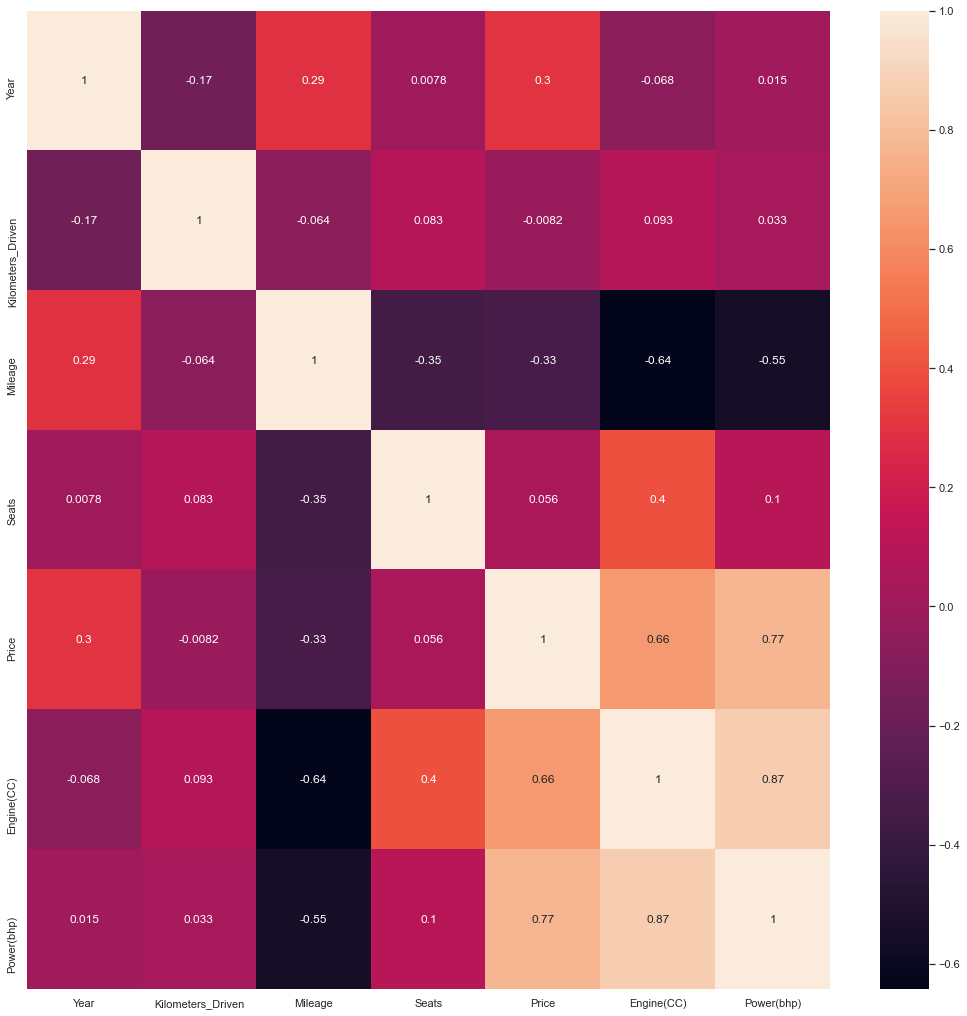

In [35]:
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(),annot=True)
plt.show()

### Inferences :

### 1) The newer the car, more mileage it gives

### 2) The more the Power(bhp), the more the price of the car

### 3) The more the Engine(CC), the more the price of the car

### 4) Haviing more Power(bhp) or Engine(CC) compromises  on mileage.

## Plotting Fuel_Type vs Mileage

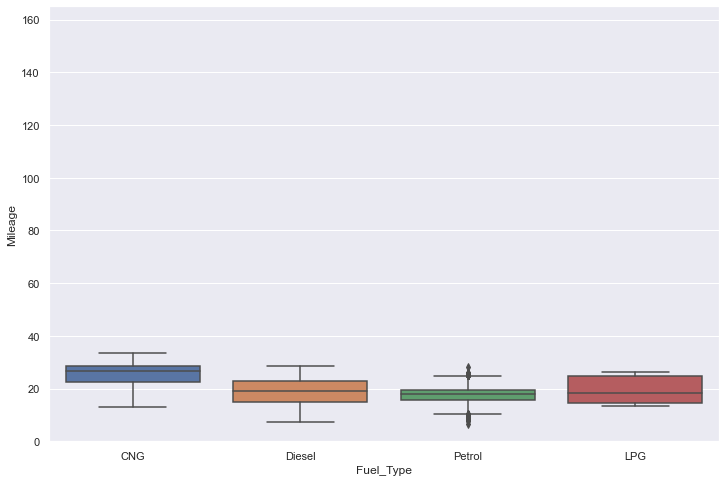

In [36]:
var = 'Fuel_Type'
data = pd.concat([df['Mileage'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(12, 8))
fig = sns.boxplot(x=var, y="Mileage", data=data)
fig.axis(ymin=0, ymax=165);

### Inference: In general, mileage is more for Diesel(kmpl) than Petrol(kmpl)

### Inference: In general, mileage is more for CNG(km/kg) than LPG(km/kg)

# Performing One-hot Encoding for different features

In [37]:
Fuel_t = df[[var]]
Fuel_t = pd.get_dummies(Fuel_t,drop_first=True)
Fuel_t.head()

Fuel_Type_Diesel  Fuel_Type_LPG  Fuel_Type_Petrol
0                 0              0                 0
1                 1              0                 0
2                 0              0                 1
3                 1              0                 0
4                 1              0                 0

In [38]:
var = 'Transmission'
Transmission = df[[var]]
Transmission = pd.get_dummies(Transmission,drop_first=True)
Transmission.head()

Transmission_Manual
0                    1
1                    1
2                    1
3                    1
4                    0

In [39]:
var = 'Location'
Location = df[[var]]
Location = pd.get_dummies(Location,drop_first=True)
Location.head()

Location_Bangalore  Location_Chennai  Location_Coimbatore  Location_Delhi  \
0                   0                 0                    0               0   
1                   0                 0                    0               0   
2                   0                 1                    0               0   
3                   0                 1                    0               0   
4                   0                 0                    1               0   

   Location_Hyderabad  Location_Jaipur  Location_Kochi  Location_Kolkata  \
0                   0                0               0                 0   
1                   0                0               0                 0   
2                   0                0               0                 0   
3                   0                0               0                 0   
4                   0                0               0                 0   

   Location_Mumbai  Location_Pune  
0                1              0  
1                0              1  
2                0              0  
3                0              0  
4                0              0

In [40]:
var = 'Name'
df[var].value_counts()

Maruti           1175
Hyundai          1058
Honda             600
Toyota            394
Mercedes-Benz     316
Volkswagen        314
Ford              294
Mahindra          268
BMW               262
Audi              235
Tata              183
Skoda             172
Renault           145
Chevrolet         120
Nissan             89
Land               57
Jaguar             40
Mitsubishi         27
Mini               26
Fiat               23
Volvo              21
Porsche            16
Jeep               15
Datsun             13
Force               3
ISUZU               2
Bentley             1
Ambassador          1
Isuzu               1
Lamborghini         1
Name: Name, dtype: int64

### Since there is a lot of variation in the brands I completely drop them

In [41]:
df.drop(['Name'],axis=1,inplace=True)

### Since Owner_Type is an ordered data. using label encoding

In [42]:
df.replace({"First":1,"Second":2,"Third": 3,"Fourth & Above":4},inplace=True)
df.head()

Location  Year  Kilometers_Driven Fuel_Type Transmission  Owner_Type  \
0      Mumbai  2010              72000       CNG       Manual           1   
1        Pune  2015              41000    Diesel       Manual           1   
2     Chennai  2011              46000    Petrol       Manual           1   
3     Chennai  2012              87000    Diesel       Manual           1   
4  Coimbatore  2013              40670    Diesel    Automatic           2   

   Mileage  Seats  Price  Engine(CC)  Power(bhp)  
0    26.60    5.0   1.75       998.0       58.16  
1    19.67    5.0  12.50      1582.0      126.20  
2    18.20    5.0   4.50      1199.0       88.70  
3    20.77    7.0   6.00      1248.0       88.76  
4    15.20    5.0  17.74      1968.0      140.80

In [43]:
df_fin= pd.concat([df,Location,Fuel_t,Transmission],axis=1)
df_fin.head()

Location  Year  Kilometers_Driven Fuel_Type Transmission  Owner_Type  \
0      Mumbai  2010              72000       CNG       Manual           1   
1        Pune  2015              41000    Diesel       Manual           1   
2     Chennai  2011              46000    Petrol       Manual           1   
3     Chennai  2012              87000    Diesel       Manual           1   
4  Coimbatore  2013              40670    Diesel    Automatic           2   

   Mileage  Seats  Price  Engine(CC)  ...  Location_Hyderabad  \
0    26.60    5.0   1.75       998.0  ...                   0   
1    19.67    5.0  12.50      1582.0  ...                   0   
2    18.20    5.0   4.50      1199.0  ...                   0   
3    20.77    7.0   6.00      1248.0  ...                   0   
4    15.20    5.0  17.74      1968.0  ...                   0   

   Location_Jaipur  Location_Kochi  Location_Kolkata  Location_Mumbai  \
0                0               0                 0                1   
1                0               0                 0                0   
2                0               0                 0                0   
3                0               0                 0                0   
4                0               0                 0                0   

   Location_Pune  Fuel_Type_Diesel  Fuel_Type_LPG  Fuel_Type_Petrol  \
0              0                 0              0                 0   
1              1                 1              0                 0   
2              0                 0              0                 1   
3              0                 1              0                 0   
4              0                 1              0                 0   

   Transmission_Manual  
0                    1  
1                    1  
2                    1  
3                    1  
4                    0  

[5 rows x 25 columns]

In [44]:
df_fin.drop(["Location","Fuel_Type","Transmission"],axis=1,inplace=True)
df_fin.head()

Year  Kilometers_Driven  Owner_Type  Mileage  Seats  Price  Engine(CC)  \
0  2010              72000           1    26.60    5.0   1.75       998.0   
1  2015              41000           1    19.67    5.0  12.50      1582.0   
2  2011              46000           1    18.20    5.0   4.50      1199.0   
3  2012              87000           1    20.77    7.0   6.00      1248.0   
4  2013              40670           2    15.20    5.0  17.74      1968.0   

   Power(bhp)  Location_Bangalore  Location_Chennai  ...  Location_Hyderabad  \
0       58.16                   0                 0  ...                   0   
1      126.20                   0                 0  ...                   0   
2       88.70                   0                 1  ...                   0   
3       88.76                   0                 1  ...                   0   
4      140.80                   0                 0  ...                   0   

   Location_Jaipur  Location_Kochi  Location_Kolkata  Location_Mumbai  \
0                0               0                 0                1   
1                0               0                 0                0   
2                0               0                 0                0   
3                0               0                 0                0   
4                0               0                 0                0   

   Location_Pune  Fuel_Type_Diesel  Fuel_Type_LPG  Fuel_Type_Petrol  \
0              0                 0              0                 0   
1              1                 1              0                 0   
2              0                 0              0                 1   
3              0                 1              0                 0   
4              0                 1              0                 0   

   Transmission_Manual  
0                    1  
1                    1  
2                    1  
3                    1  
4                    0  

[5 rows x 22 columns]

# Final Clean Data

In [45]:
df_fin.shape

(5872, 22)

# Plotting heatmap for final data

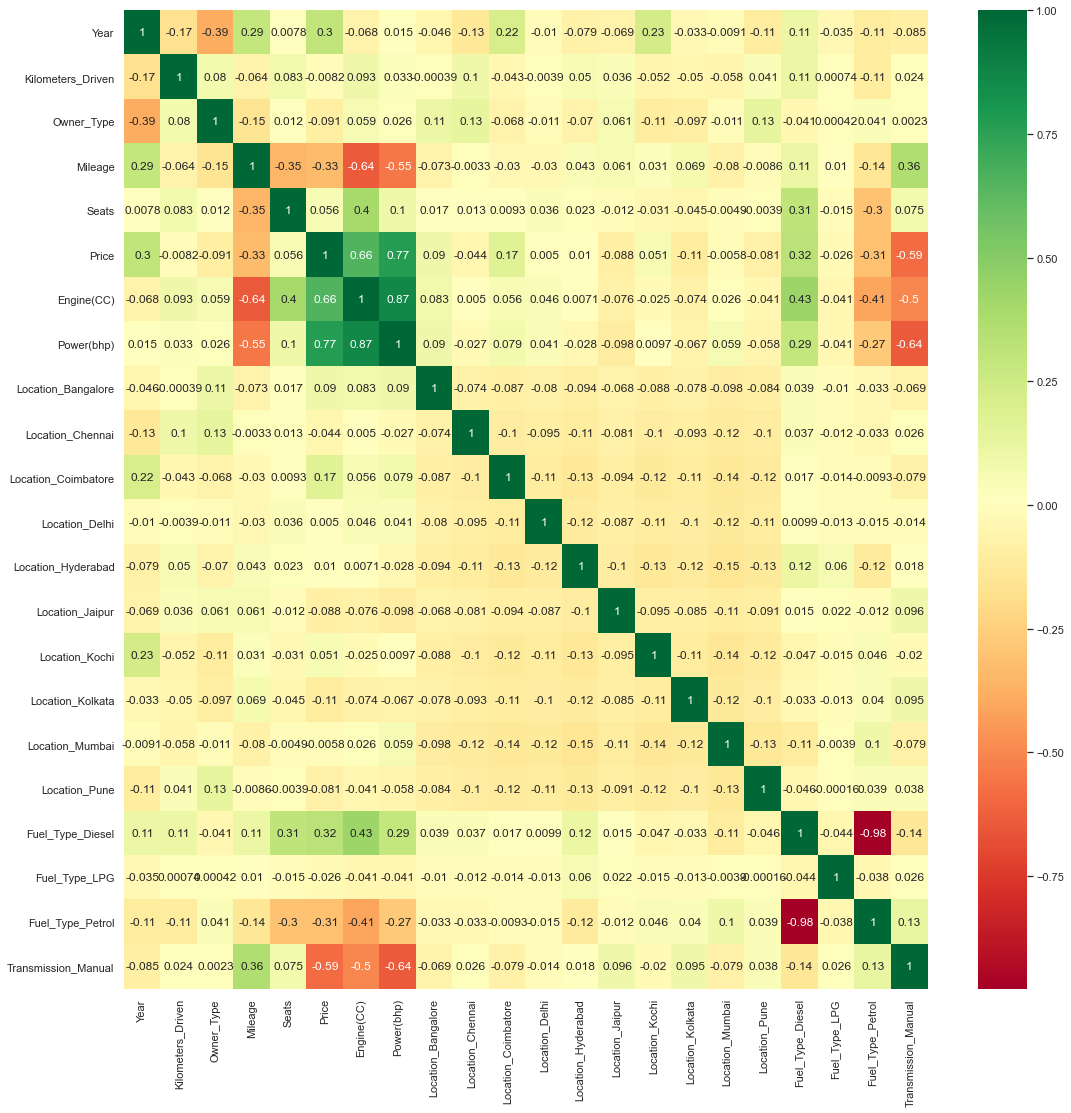

In [46]:
plt.figure(figsize=(18,18))
sns.heatmap(df_fin.corr(),annot=True,cmap='RdYlGn')
plt.show()

## Inference:

### Features which promote increase pricing

#### More Power(bhp), Engine(CC), Newness(Year built), Diesel_Type_Fuel

### Features which decrease pricing

#### Manual Transmission, Petrol_Type_Fuel 

# Preparing the data to work on

In [47]:
X = df_fin.loc[:,['Year', 'Kilometers_Driven', 'Owner_Type', 'Seats',
       'Mileage', 'Engine(CC)', 'Power(bhp)', 
       'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur',
       'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai',
       'Location_Pune', 'Fuel_Type_Diesel', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Transmission_Manual']]
print(X.shape)
X.head()

(5872, 21)


Year  Kilometers_Driven  Owner_Type  Seats  Mileage  Engine(CC)  \
0  2010              72000           1    5.0    26.60       998.0   
1  2015              41000           1    5.0    19.67      1582.0   
2  2011              46000           1    5.0    18.20      1199.0   
3  2012              87000           1    7.0    20.77      1248.0   
4  2013              40670           2    5.0    15.20      1968.0   

   Power(bhp)  Location_Bangalore  Location_Chennai  Location_Coimbatore  ...  \
0       58.16                   0                 0                    0  ...   
1      126.20                   0                 0                    0  ...   
2       88.70                   0                 1                    0  ...   
3       88.76                   0                 1                    0  ...   
4      140.80                   0                 0                    1  ...   

   Location_Hyderabad  Location_Jaipur  Location_Kochi  Location_Kolkata  \
0                   0                0               0                 0   
1                   0                0               0                 0   
2                   0                0               0                 0   
3                   0                0               0                 0   
4                   0                0               0                 0   

   Location_Mumbai  Location_Pune  Fuel_Type_Diesel  Fuel_Type_LPG  \
0                1              0                 0              0   
1                0              1                 1              0   
2                0              0                 0              0   
3                0              0                 1              0   
4                0              0                 1              0   

   Fuel_Type_Petrol  Transmission_Manual  
0                 0                    1  
1                 0                    1  
2                 1                    1  
3                 0                    1  
4                 0                    0  

[5 rows x 21 columns]

In [48]:
y=df_fin.loc[:,['Price']]
y.head()

Price
0   1.75
1  12.50
2   4.50
3   6.00
4  17.74

## Predicting which features might be more important than others

<ipython-input-49-6b7b9bfa8d07>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  select.fit(X,y)


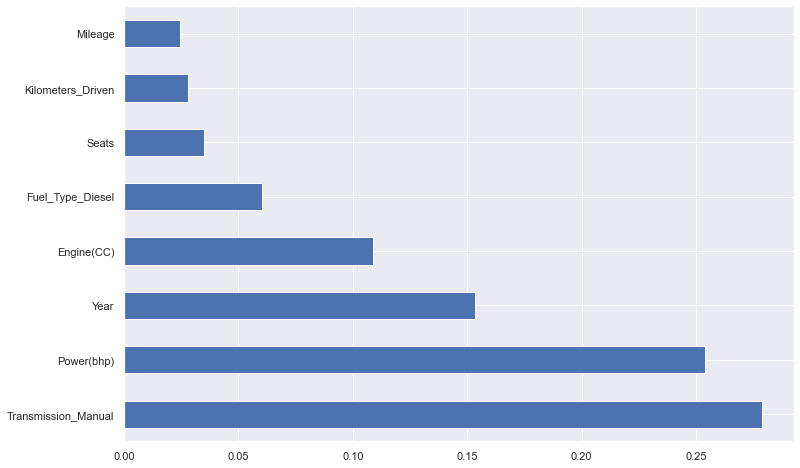

In [49]:
from sklearn.ensemble import ExtraTreesRegressor
select= ExtraTreesRegressor()
select.fit(X,y)
plt.figure(figsize = (12,8))
feat_importances = pd.Series(select.feature_importances_, index=X.columns)
feat_importances.nlargest(8).plot(kind='barh')
plt.show()

## Splitting the data into training and test data

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Performing Linear Regression on the training data

In [51]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression(normalize=True)
linear_reg.fit(X_train, y_train)
y_pred= linear_reg.predict(X_test)
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)
print("Mean Squared Error: ", mse)
print("Accuracy on Traing set: ",linear_reg.score(X_train,y_train))
print("Accuracy on Testing set: ",linear_reg.score(X_test,y_test))

Mean Squared Error:  40.72663382083628
Accuracy on Traing set:  0.7002585159583146
Accuracy on Testing set:  0.7155882803055601


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)
mn=y_train.mean()

## Training a Neural Network on the training data

In [53]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers

NNinput = X_train.shape[1]
act = tf.keras.layers.LeakyReLU(alpha=0.05)
reg=tf.keras.regularizers.l1(0.05)
opt=tf.keras.optimizers.Adam(learning_rate=0.01)
ls='mean_squared_error'
init=tf.keras.initializers.RandomNormal(mean=mn, stddev=2.0)
tf.keras.backend.clear_session()
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=NNinput))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(512, activation = act))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(256, activation = act))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(128 ,activation = act))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(64 ,activation = act))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(32, activation = act))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(1, activation = act,kernel_initializer=init))
model.add(tf.keras.layers.BatchNormalization())
model.compile(loss=ls,optimizer=opt,metrics=['mse'])
model.summary()

batch_size = 100
epoch = 100
history = model.fit(X_train, y_train, epochs = epoch, batch_size = batch_size, verbose = 1, validation_data=(X_test, y_test))

Using TensorFlow backend.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 21)                84        
_________________________________________________________________
dense (Dense)                (None, 512)               11264     
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               5

45/45 [==============================] - 0s 7ms/step - loss: 15.3741 - mse: 15.3741 - val_loss: 23.9727 - val_mse: 23.9727
Epoch 46/100
45/45 [==============================] - 0s 6ms/step - loss: 15.6034 - mse: 15.6034 - val_loss: 21.3808 - val_mse: 21.3808
Epoch 47/100
45/45 [==============================] - 0s 6ms/step - loss: 15.9181 - mse: 15.9181 - val_loss: 20.4895 - val_mse: 20.4895
Epoch 48/100
45/45 [==============================] - 0s 6ms/step - loss: 17.0306 - mse: 17.0306 - val_loss: 26.6595 - val_mse: 26.6595
Epoch 49/100
45/45 [==============================] - 0s 6ms/step - loss: 15.2907 - mse: 15.2907 - val_loss: 20.6860 - val_mse: 20.6860
Epoch 50/100
45/45 [==============================] - 0s 6ms/step - loss: 13.4744 - mse: 13.4744 - val_loss: 22.7410 - val_mse: 22.7410
Epoch 51/100
45/45 [==============================] - 0s 6ms/step - loss: 16.0168 - mse: 16.0168 - val_loss: 19.9917 - val_mse: 19.9917
Epoch 52/100
45/45 [==============================] - 0s 6ms/

### Predicting the price from the neural nework

In [54]:
y_pred = model.predict(X_test)
y_pred=pd.DataFrame(y_pred)

## Calculating the Mean Squared Error on the test data

In [55]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)
print("Mean Squared Error: ", mse)

Mean Squared Error:  20.361174886931916


## We can notice that the MSE is better than what we had for linear regression

# Plotting the training and test loss as we progress to train the NN

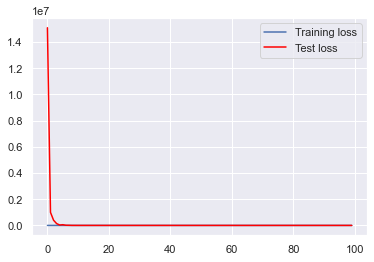

In [56]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], color='red', label='Test loss')
plt.legend()

## Evaluating the model

In [57]:
model.evaluate(X_test,y_test,verbose=1)

46/46 [==============================] - 0s 1ms/step - loss: 20.3612 - mse: 20.3612


[20.36117172241211, 20.36117172241211]

In [58]:
y_test=pd.DataFrame(y_test)

# Comparing how predicted price vs actual price looks like

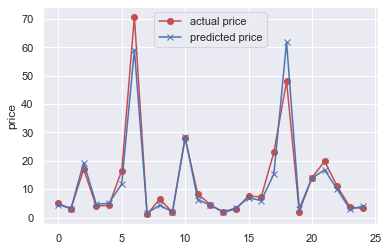

In [59]:
num_samples=25
np.random.seed(13)
idx=np.random.randint(0,len(y_test),num_samples) 
plt.plot(range(num_samples),y_test.iloc[idx],'ro-')
plt.plot(range(num_samples),y_pred.iloc[idx],'bx-')
plt.ylabel("price")
plt.legend(["actual price",'predicted price','mean price'])

# Clustering different types of Customers

### Clustering on the basis of how much the customers are paying for a car

In [60]:
from sklearn.cluster import KMeans
k_means_model = KMeans(n_clusters=3,random_state=50) 
k_means_model.fit(y)
pred = k_means_model.predict(y)

In [61]:
cluster1 = y[(pred==0)]
cluster2 = y[(pred == 1)]
cluster3 = y[(pred == 2)]
l1=cluster1.min().to_string()
r1=cluster1.max().to_string()
l2=cluster2.min().to_string()
r2=cluster2.max().to_string()
l3=cluster3.min().to_string()
r3=cluster3.max().to_string()

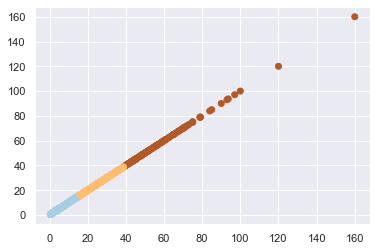

In [62]:
plt.scatter(y, y, c=pred, cmap=plt.cm.Paired)
plt.show()

### We can see three different types of customers

In [63]:
print("MIDDLE CLASS")
print(l1,'-',r1)
print("Count :",len(cluster1))

MIDDLE CLASS
Price    0.44 - Price    14.79
Count : 4878


In [64]:
print("UPPER MIDDLE CLASS")
print(l2,'-',r2)
print("Count :",len(cluster2))

UPPER MIDDLE CLASS
Price    14.82 - Price    39.62
Count : 819


In [65]:
print("UPPER CLASS")
print(l3,'-',r3)
print("Count :",len(cluster3))

UPPER CLASS
Price    39.75 - Price    160.0
Count : 175
